# Implementation of KNN Using Iris Dataset

 This notebook demonstrates the K-Nearest Neighbors (KNN) classification algorithm on the Iris dataset. We:
 
 - Load and scale the data using `StandardScaler`.
 - Split the data into training and testing sets.
 - Train a KNN classifier with a default of 3 neighbors.
 - Evaluate the model using the confusion matrix, F1 scores (macro, micro, and weighted), and a classification report.
 
## **Additional Enhancements:**
 
 - We visualize the confusion matrix with a heatmap.
 - We perform a simple grid search to find an optimal K value.
 - We reduce the data to 2 dimensions using PCA and plot the decision boundaries for visualization.
 
## **Background:**
 
 The Iris dataset has 4 features (sepal length, sepal width, petal length, petal width) and 3 classes. The KNN algorithm is a non-parametric, distance-based classifier that uses the majority vote among the K nearest neighbors to assign class labels.
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.decomposition import PCA


#### Data Loading and Preprocessing

We load the Iris dataset and scale the feature matrix. The target labels are kept as-is since they are categorical.



In [3]:
d = load_iris()       # Iris dataset
a = d.data            # Feature matrix (4 features)
b = d.target          # Target labels (3 classes)

sc = StandardScaler() # Standard scaler for features
s = sc.fit_transform(a)  # Scaled features


#### Split data into training and testing sets (80/20 split)

In [4]:
X_tr, X_ts, y_tr, y_ts = train_test_split(s, b, test_size=0.2, random_state=42)


#### KNN Model Training and Evaluation
 We create a KNN classifier with 3 neighbors, fit it to the training data, and obtain predictions on the test set. We then evaluate the model using:
 - Confusion matrix
 - F1 scores (macro, micro, weighted)
 - Classification report


#### Create and train KNN model

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr, y_tr)

# Predict on test data
y_pred = knn.predict(X_ts)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_ts, y_pred))
print("\nF1 Score (Macro):", f1_score(y_ts, y_pred, average='macro'))
print("F1 Score (Micro):", f1_score(y_ts, y_pred, average='micro'))
print("F1 Score (Weighted):", f1_score(y_ts, y_pred, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_ts, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

F1 Score (Macro): 1.0
F1 Score (Micro): 1.0
F1 Score (Weighted): 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Confusion Matrix Heatmap
 We visualize the confusion matrix using Seaborn's heatmap for a more intuitive understanding of the classification performance.


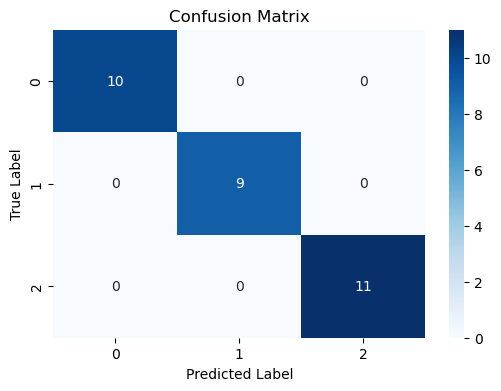

In [6]:
cm = confusion_matrix(y_ts, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### 2. Grid Search for Optimal K
 We perform a simple grid search over K values (from 1 to 20) to observe how the choice of K affects the model accuracy. The best K value based on the test set accuracy is identified.


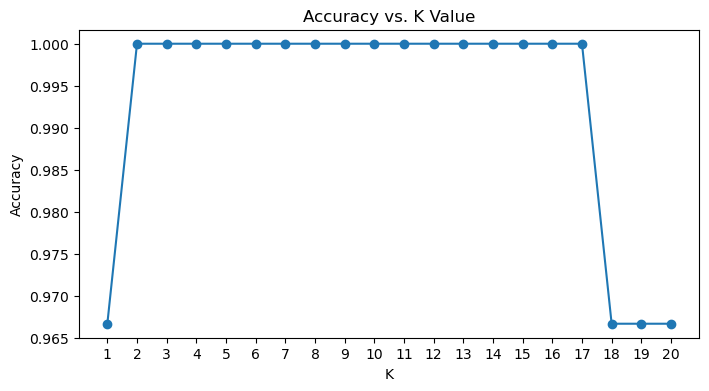

Best K: 2 with accuracy: 1.0


In [7]:
acc = []                       # To store accuracy values for different K
k_range = range(1, 21)         # K values from 1 to 20

for k in k_range:
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_tr, y_tr)
    pred = kn.predict(X_ts)
    acc.append(accuracy_score(y_ts, pred))

plt.figure(figsize=(8, 4))
plt.plot(k_range, acc, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()

best_k = k_range[np.argmax(acc)]
print("Best K:", best_k, "with accuracy:", max(acc))


#### 3. PCA-Based Decision Boundary Visualization
 Since the Iris dataset has 4 dimensions, we apply PCA to reduce the data to 2 dimensions. We then fit a KNN classifier on this transformed data and plot the decision boundaries.


In [8]:
pca = PCA(n_components=2)
s_pca = pca.fit_transform(s)

#### Split the PCA-transformed data

In [ ]:
X_tr_p, X_ts_p, y_tr_p, y_ts_p = train_test_split(s_pca, b, test_size=0.2, random_state=42)

#### Fit KNN on PCA-transformed data

In [13]:
knn_p = KNeighborsClassifier(n_neighbors=3)
knn_p.fit(X_tr_p, y_tr_p)

KNeighborsClassifier(n_neighbors=3)


##### Create a mesh to plot decision boundaries

In [ ]:
x_min, x_max = s_pca[:, 0].min() - 1, s_pca[:, 0].max() + 1
y_min, y_max = s_pca[:, 1].min() - 1, s_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = knn_p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#### Plot decision boundary and data points

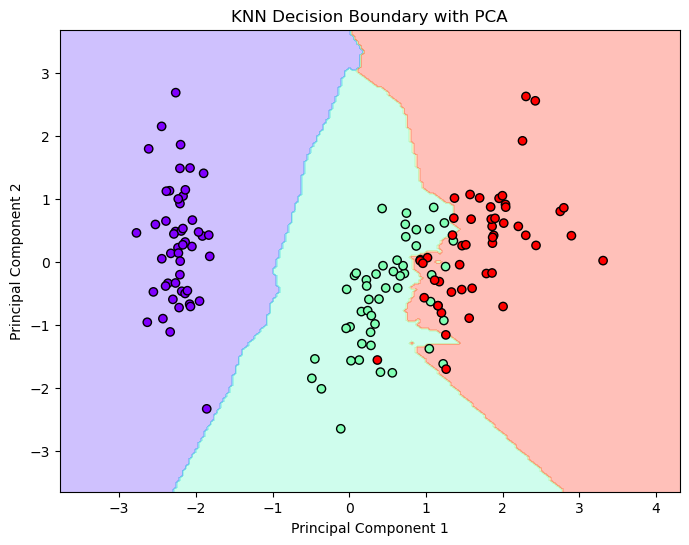

In [14]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)
plt.scatter(s_pca[:, 0], s_pca[:, 1], c=b, edgecolor='k', cmap=plt.cm.rainbow)
plt.title("KNN Decision Boundary with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()